### STUDENT PERFORMANCE INDICATOR


### LIFE CYCLE OF MACHINE LEARNING
 understanding the problem statement,
 data collection,
 exploratory data analysis,
 data pre-processing,
 model training,
 choose best model


# problem statement

this project understands how the student performance (test source) is affected by other variables such as gender,ethinicty,partenal level of education,lunch and test preparation course

## 2) data collection

the data consists of 8 columns and 1000 rows

2.1) import data and required packages

## importing pandas, numpy , matplotlib,seaborn

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')

In [34]:
df=pd.read_csv("data/stud.csv")

In [35]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [36]:
df.shape

(1000, 8)

# data checks performs



checks missing values . checks duplicate values , chacks datatype , chaeck the number of unique values from each column, checks statics of data , chacks various cateogries from varous categorical columns

In [37]:
##checking missing values
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [38]:
###duplicates 
df.duplicated().sum()

np.int64(0)

In [39]:
###checking the info and datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [40]:
###checking the uniquecolumns 
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [41]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [42]:
print("cateogrical in gender variable : ",end="")
print(df['gender'].unique())

print("cateogrical in race_ethnicity variable : ",end="")
print(df['race_ethnicity'].unique())

print("cateogrical in parental_level_of_education variable : ",end="")
print(df['parental_level_of_education'].unique())

print("cateogrical in lunch variable : ",end="")
print(df['lunch'].unique())

print("cateogrical in test_preparation_course variable : ",end="")
print(df['test_preparation_course'].unique())



cateogrical in gender variable : ['female' 'male']
cateogrical in race_ethnicity variable : ['group B' 'group C' 'group A' 'group D' 'group E']
cateogrical in parental_level_of_education variable : ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
cateogrical in lunch variable : ['standard' 'free/reduced']
cateogrical in test_preparation_course variable : ['none' 'completed']


In [43]:
##categrorising the numeric feature and categorical feature 
numeric_feature=[feature for feature in df.columns if df[feature].dtype!='O']
categoric_feature=[feature for feature in df.columns if df[feature].dtype=='O']
print("the  numeric features of length is {}  are {}".format(len(numeric_feature),numeric_feature))
print("categroic gfaeture of length is {} are {} ".format(len(categoric_feature),categoric_feature))

the  numeric features of length is 3  are ['math_score', 'reading_score', 'writing_score']
categroic gfaeture of length is 5 are ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course'] 


## adding the total score and average}

In [44]:
df['total_score']=df['math_score']+df['reading_score']+df['writing_score']
df['avg']=df['total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,avg
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [45]:
### calculating the how amny students score out of out
reading_full=df[df['reading_score']==100]['avg'].count()
writing_full=df[df['writing_score']==100]['avg'].count()
math_full=df[df['math_score']==100]['avg'].count()
print("number of students score full marks in reading are : ",reading_full)
print("number of students score full marks in writing are : ",writing_full)
print("number of students score full marks in maths are : ",math_full)


number of students score full marks in reading are :  17
number of students score full marks in writing are :  14
number of students score full marks in maths are :  7


In [47]:
reading_less_20=df[df['reading_score']<=20]['avg'].count()
writing_less_20=df[df['writing_score']<=20]['avg'].count()
math_less_20=df[df['math_score']<=20]['avg'].count()

print("number of students score less than equal 20  marks in reading are : ",reading_less_20)
print("number of students score less than equal to 20 marks in writing are : ",writing_less_20)
print("number of students score less than 20 marks in maths are : ",math_less_20)

number of students score less than equal 20  marks in reading are :  1
number of students score less than equal to 20 marks in writing are :  3
number of students score less than 20 marks in maths are :  4


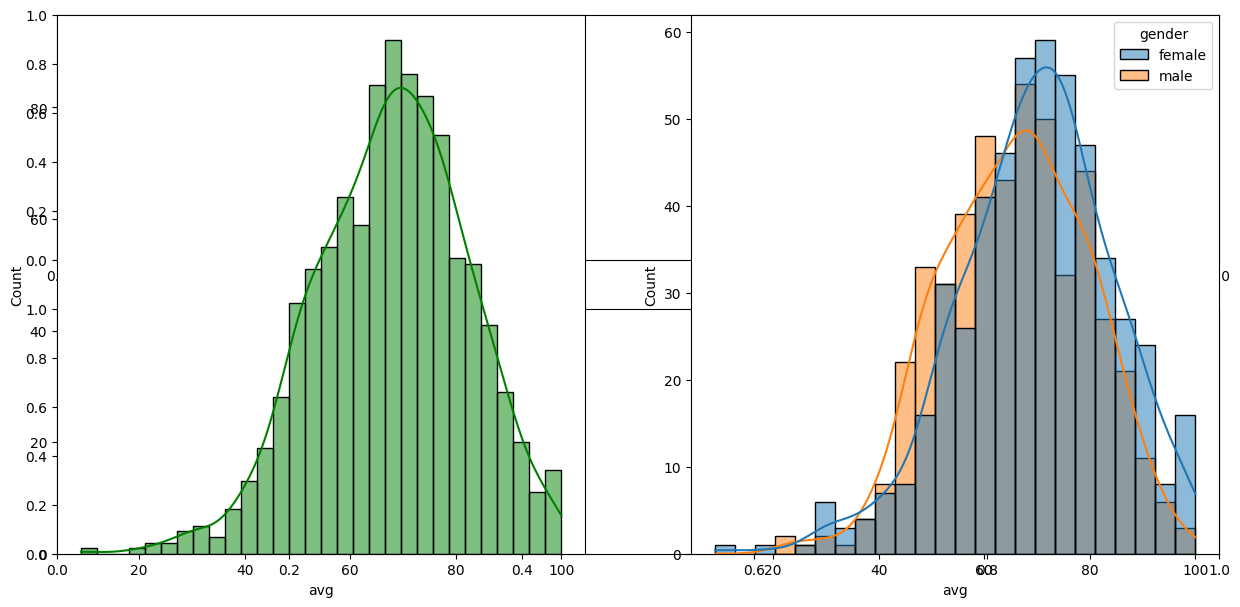

In [49]:
##histogram and kde
fig,axs=plt.subplots(2,1,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='avg',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='avg',hue='gender',kde=True)
plt.show()

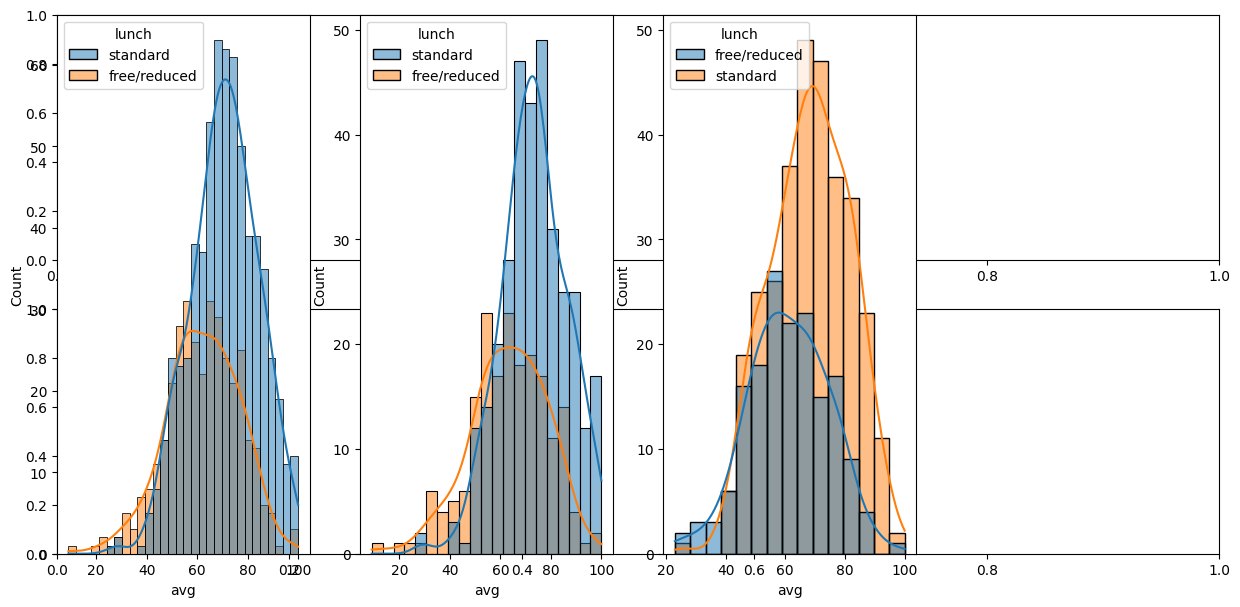

In [50]:
fig,axs=plt.subplots(2,1,figsize=(15,7))
plt.subplot(141)
sns.histplot(data=df,x='avg',bins=30,kde=True,color='g',hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='avg',hue='lunch',kde=True)
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='avg',hue='lunch',kde=True)
plt.show()